# This notebook find the most massive satellites of each halo in the Latte suite

In [1]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
#plt.style.use("/mnt/home/nico/matplotlib.mplstyle")
import h5py
#import nba
import sys
import numpy as np
sys.path.append("/mnt/home/ecunningham/python")
sys.path.append("../scripts/src/")
#import pynbody-
import pynbody_routines as pr
import gizmo_analysis as ga

from matplotlib import colors
import halo_analysis as halo
import io_gizmo_pynbody as gp
import analysis as an
from scipy.linalg import norm

In [10]:
plt.rcParams['text.usetex'] = False

In [119]:
# Get all the subhalos orbits
def get_halo_satellite(sim, mass_rank, ninit=300):
    sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)
    m12_subhalos = halo.io.IO.read_catalogs('snapshot', ninit, sim_directory)

    halt = halo.io.IO.read_tree(simulation_directory=sim_directory)
    hsub = pr.pynbody_subhalos(m12_subhalos)
    sat_id = np.argsort(hsub.dark['mass'])[mass_rank]
    sat_tree_id = m12_subhalos['tree.index'][sat_id]
    #infall_snap = m12_subhalos['infall.first.snapshot'][sat_id]

    # The function below finds the orbit 
    satellite = gp.return_tracked_pos(halt, sat_tree_id, pynbody_halo=True, nsnaps=600-ninit)
    return satellite, hsub.dark['mass'][sat_id], sat_tree_id


In [3]:
def host_times(sim):
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[:] 

In [4]:
m12b_t = host_times('m12b')
m12c_t = host_times('m12c')
m12f_t = host_times('m12f')
m12i_t = host_times('m12i')
m12m_t = host_times('m12m')
m12r_t = host_times('m12r')
m12w_t = host_times('m12w')



In [116]:
# Satellites orbits 
m12b_snapi = 150
m12c_snapi = 250
m12f_snapi1 = 150
m12f_snapi2 = 200
m12i_snapi = 300
m12m_snapi = 300

m12r_snapi1 = 260
m12r_snapi2 = 300
m12r_snapi3 = 250

m12w_snapi1 = 200
m12w_snapi2 = 230
m12w_snapi3 = 220


m12b_sat, m12b_msat, m12b3id = get_halo_satellite('m12b', -2, ninit=m12b_snapi)

m12c_sat, m12c_msat, m12c3id = get_halo_satellite('m12c', -4, ninit=m12c_snapi)

m12f_sat1, m12f_msat1, m12fs1_treeid = get_halo_satellite('m12f', -3, ninit=m12f_snapi1)
m12f_sat2, m12f_msat2, m12fs2_treeid = get_halo_satellite('m12f', -4, ninit=m12f_snapi2)

m12i_sat, m12i_msat, m12i3id = get_halo_satellite('m12i', -11, ninit=m12i_snapi)
m12m_sat, m12m_msat, m12m3id = get_halo_satellite('m12m', -19, ninit=m12m_snapi)


m12r_sat1, m12r_msat1, m12r3id1 = get_halo_satellite('m12r', -2, ninit=m12r_snapi1)
m12r_sat2, m12r_msat2, m12r3id2 = get_halo_satellite('m12r', -3, ninit=m12r_snapi2)
m12r_sat3, m12r_msat3, m12r3id3 = get_halo_satellite('m12r', -4, ninit=m12r_snapi3)


m12w_sat1, m12w_msat1, m12w3id1 = get_halo_satellite('m12w', -3 ,ninit=m12w_snapi1)
m12w_sat2, m12w_msat2, m12w3id2 = get_halo_satellite('m12w', -9, ninit=m12w_snapi2)
m12w_sat3, m12w_msat3, m12w3id3 = get_halo_satellite('m12w', -6, ninit=m12w_snapi3)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 150, redshift = 2.355

* read 35045 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_150.hdf5

# in halo_analysis.halo_io.Particle():
* read 35045 halos, 168 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_150.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5



"\nm12c_sat, m12c_msat, m12c3id = get_halo_satellite('m12c', -4, ninit=m12c_snapi)\n\nm12f_sat1, m12f_msat1, m12fs1_treeid = get_halo_satellite('m12f', -3, ninit=m12f_snapi1)\nm12f_sat2, m12f_msat2, m12fs2_treeid = get_halo_satellite('m12f', -4, ninit=m12f_snapi2)\n\nm12i_sat, m12i_msat, m12i3id = get_halo_satellite('m12i', -11, ninit=m12i_snapi)\nm12m_sat, m12m_msat, m12m3id = get_halo_satellite('m12m', -19, ninit=m12m_snapi)\n\n\nm12r_sat1, m12r_msat1, m12r3id1 = get_halo_satellite('m12r', -2, ninit=m12r_snapi1)\nm12r_sat2, m12r_msat2, m12r3id2 = get_halo_satellite('m12r', -3, ninit=m12r_snapi2)\nm12r_sat3, m12r_msat3, m12r3id3 = get_halo_satellite('m12r', -4, ninit=m12r_snapi3)\n\n\nm12w_sat1, m12w_msat1, m12w3id1 = get_halo_satellite('m12w', -3 ,ninit=m12w_snapi1)\nm12w_sat2, m12w_msat2, m12w3id2 = get_halo_satellite('m12w', -9, ninit=m12w_snapi2)\nm12w_sat3, m12w_msat3, m12w3id3 = get_halo_satellite('m12w', -6, ninit=m12w_snapi3)\n"

In [117]:
m12b_isnap

150

In [118]:
m12b_apo

176

In [220]:
tree_ids = np.array([m12b3id, m12c3id, m12fs1_treeid, m12fs2_treeid, 
                    m12i3id, m12m3id, m12r3id1, m12r3id2, m12r3id3,
                    m12w3id1, m12w3id2, m12w3id2])

In [221]:
tree_ids

array([2665014, 5293696, 2872292, 2301491,  693251, 1764445,  897039,
       1871986, 2255307, 1267876, 3286270, 3286270], dtype=int32)

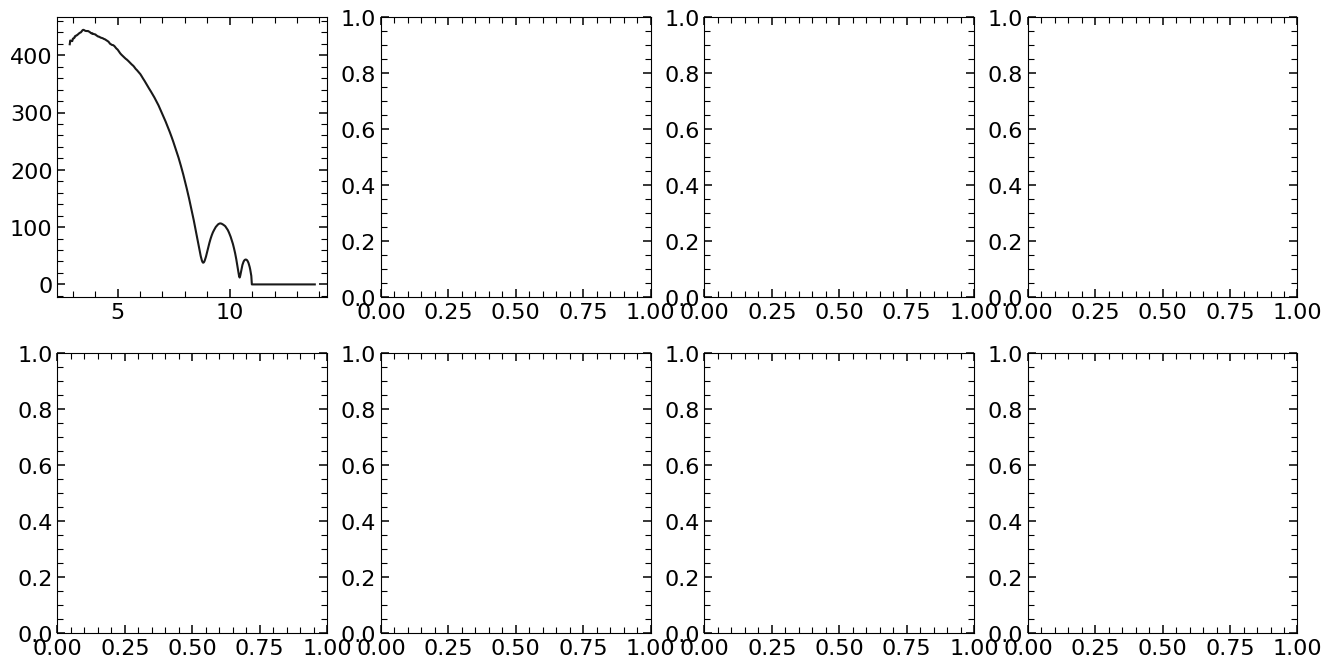

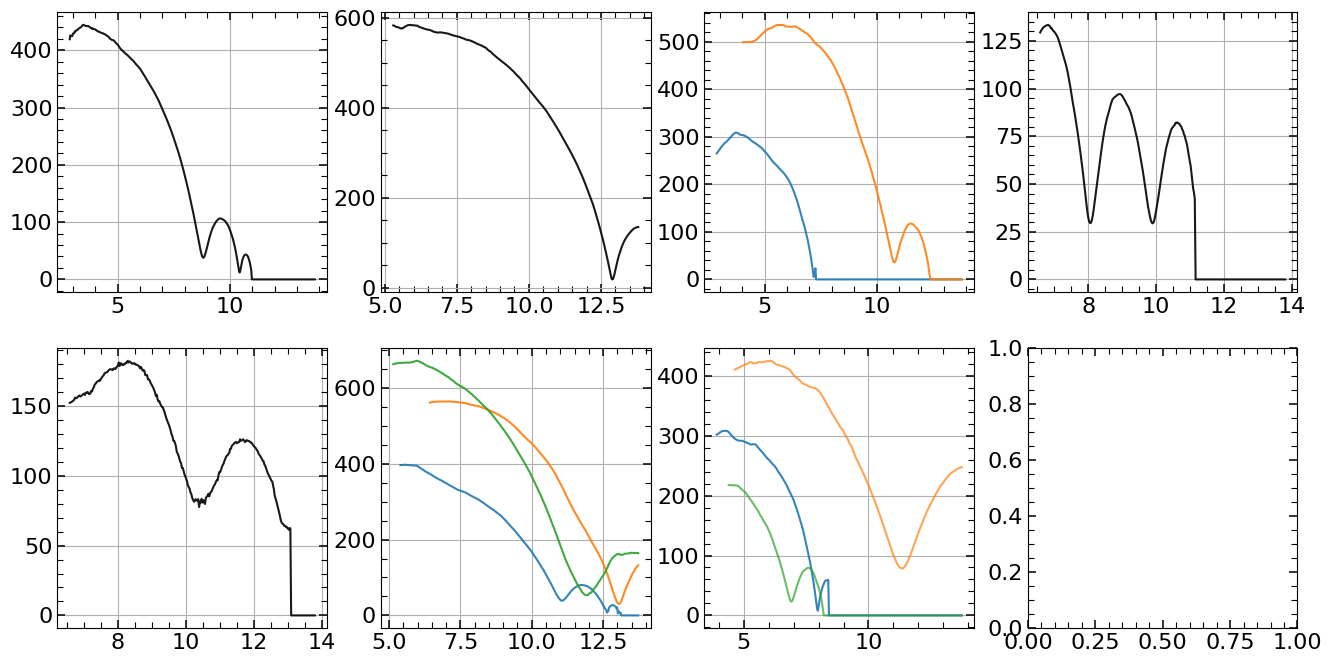

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8))

ax[0][0].plot(m12b_t[m12b_snapi:-1], norm(m12b_sat['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 


ax[0][1].plot(m12c_t[m12c_snapi:-1], norm(m12c_sat['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 

ax[0][2].plot(m12f_t[m12f_snapi1:-1], norm(m12f_sat1['pos'], axis=1), c='C0', lw=1.5, alpha=0.9) 
ax[0][2].plot(m12f_t[m12f_snapi2:-1], norm(m12f_sat2['pos'], axis=1), c='C1', lw=1.5, alpha=0.9) 

ax[0][3].plot(m12i_t[m12i_snapi:-1], norm(m12i_sat['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 

ax[1][0].plot(m12m_t[m12m_snapi:-1], norm(m12m_sat['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 

ax[1][1].plot(m12r_t[m12r_snapi1:-1], norm(m12r_sat1['pos'], axis=1), c='C0', lw=1.5, alpha=0.9) 
ax[1][1].plot(m12r_t[m12r_snapi2:-1], norm(m12r_sat2['pos'], axis=1), c='C1', lw=1.5, alpha=0.9) 
ax[1][1].plot(m12r_t[m12r_snapi3:-1], norm(m12r_sat3['pos'], axis=1), c='C2', lw=1.5, alpha=0.9) 

ax[1][2].plot(m12w_t[m12w_snapi1:-1], norm(m12w_sat1['pos'], axis=1)[:], c='C0', lw=1.5, alpha=0.9) 
ax[1][2].plot(m12w_t[m12w_snapi2:-1], norm(m12w_sat2['pos'], axis=1)[:], c='C1', lw=1.5, alpha=0.7) 
ax[1][2].plot(m12w_t[m12w_snapi3:-1], norm(m12w_sat3['pos'], axis=1)[:], c='C2', lw=1.5, alpha=0.7) 

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()
ax[0][3].grid()
ax[1][0].grid()
ax[1][1].grid()
ax[1][2].grid()

plt.show()
#plt.savefig('hey.png')




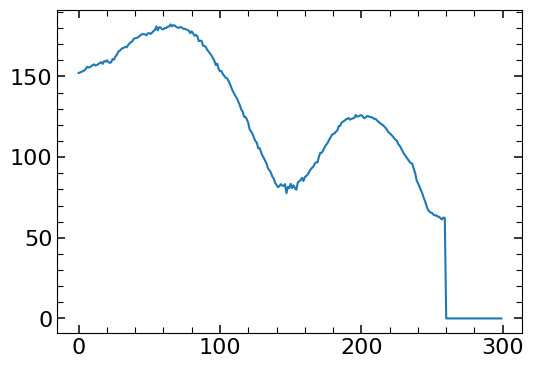

In [70]:
plt.plot(norm(m12m_sat['pos'], axis=1))
plt.show()

In [31]:
## Apocenter and pericenter information


## Snapshot 
m12b_peri = np.argmin(norm(m12b_sat['pos'][:250], axis=1)) + m12b_snapi
m12b_apo = np.argmax(norm(m12b_sat['pos'][:100], axis=1)) + m12b_snapi

m12c_peri = np.argmin(norm(m12c_sat['pos'], axis=1)) + m12c_snapi
m12c_apo = np.argmax(norm(m12c_sat['pos'], axis=1)) + m12c_snapi

m12f_peri1 = np.argmin(norm(m12f_sat1['pos'], axis=1)) + m12f_snapi1
m12f_peri2 = np.argmin(norm(m12f_sat2['pos'][:300], axis=1)) + m12f_snapi2

m12f_apo1 = np.argmax(norm(m12f_sat1['pos'], axis=1)) + m12f_snapi1
m12f_apo2 = np.argmax(norm(m12f_sat1['pos'], axis=1)) + m12f_snapi2


m12i_peri = np.argmin(norm(m12i_sat['pos'][:80], axis=1)) + m12i_snapi
m12i_apo = np.argmax(norm(m12i_sat['pos'][:80], axis=1)) + m12i_snapi

m12m_peri = np.argmin(norm(m12m_sat['pos'][:200], axis=1)) + m12m_snapi
m12m_apo = np.argmax(norm(m12m_sat['pos'][:200], axis=1)) + m12m_snapi

m12r_peri1 = np.argmin(norm(m12r_sat1['pos'][:250], axis=1)) + m12r_snapi1
m12r_peri2 = np.argmin(norm(m12r_sat2['pos'], axis=1)) + m12r_snapi2
m12r_peri3 = np.argmin(norm(m12r_sat3['pos'], axis=1)) + m12r_snapi3

m12r_apo1 = np.argmax(norm(m12r_sat1['pos'], axis=1)) + m12r_snapi1
m12r_apo2 = np.argmax(norm(m12r_sat2['pos'], axis=1)) + m12r_snapi2
m12r_apo3 = np.argmax(norm(m12r_sat3['pos'], axis=1)) + m12r_snapi3

m12w_peri1= np.argmin(norm(m12w_sat1['pos'][:170], axis=1)) + m12w_snapi1
m12w_peri2= np.argmin(norm(m12w_sat2['pos'], axis=1)) + m12w_snapi2
m12w_peri3= np.argmin(norm(m12w_sat3['pos'][:120], axis=1)) + m12w_snapi3

m12w_apo1= np.argmax(norm(m12w_sat1['pos'], axis=1)) + m12w_snapi1
m12w_apo2= np.argmax(norm(m12w_sat2['pos'], axis=1)) + m12w_snapi2
m12w_apo3= np.argmax(norm(m12w_sat3['pos'], axis=1)) + m12w_snapi3

In [50]:
m12b_sat_mass_apo = m12b_sat['mass'][m12b_apo-m12b_snapi] / 1e10
m12c_sat_mass_apo = m12c_sat['mass'][m12c_apo-m12c_snapi] / 1e10
m12f_sat_mass_apo1 = m12f_sat1['mass'][m12f_apo1-m12f_snapi1] / 1e10
m12f_sat_mass_apo2 = m12f_sat2['mass'][m12f_apo2-m12f_snapi2] / 1e10
m12i_sat_mass_apo = m12i_sat['mass'][m12i_apo-m12i_snapi] / 1e10
m12m_sat_mass_apo = m12m_sat['mass'][m12m_apo-m12m_snapi] / 1e10

m12r_sat_mass_apo1 = m12r_sat1['mass'][m12r_apo1-m12r_snapi1] / 1e10
m12r_sat_mass_apo2 = m12r_sat2['mass'][m12r_apo2-m12r_snapi2] / 1e10
m12r_sat_mass_apo3 = m12r_sat3['mass'][m12r_apo3-m12r_snapi3] / 1e10

m12w_sat_mass_apo1 = m12w_sat1['mass'][m12w_apo1-m12w_snapi1] / 1e10
m12w_sat_mass_apo2 = m12w_sat2['mass'][m12w_apo2-m12w_snapi2] / 1e10
m12w_sat_mass_apo3 = m12w_sat3['mass'][m12w_apo3-m12w_snapi3] / 1e10


m12_mass_apo = np.array([m12b_sat_mass_apo, m12c_sat_mass_apo, m12f_sat_mass_apo1, m12f_sat_mass_apo2, 
     m12i_sat_mass_apo, m12m_sat_mass_apo, m12r_sat_mass_apo1, m12r_sat_mass_apo2, 
      m12r_sat_mass_apo3, m12w_sat_mass_apo1, m12w_sat_mass_apo2, m12w_sat_mass_apo3])

m12_snap_apo = np.array([m12b_apo, m12c_apo, m12f_apo1, m12f_apo2, m12i_apo, m12m_apo,
                        m12r_apo1, m12r_apo2, m12r_apo3, m12w_apo1, m12w_apo2, m12w_apo3])
m12_snap_peri = np.array([m12b_peri, m12c_peri, m12f_peri1, m12f_peri2, m12i_peri, m12m_peri,
                        m12r_peri1, m12r_peri2, m12r_peri3, m12w_peri1, m12w_peri2, m12w_peri3])

In [51]:
m12_mass_apo 

array([14.8390314 ,  8.71353303,  7.18575534, 12.51538534,  2.12108268,
        2.35384627, 13.03455826,  8.68999987,  4.51073516,  7.30279363,
        3.90161777,  4.09279406])

In [54]:
m12_snap_peri

array([385, 551, 327, 463, 356, 447, 479, 562, 514, 359, 491, 318])

In [55]:
m12_snap_apo

array([176, 273, 187, 237, 309, 365, 267, 324, 282, 215, 286, 224])

In [56]:
def get_eccentricities(pos):
    rapo = np.max(pos)
    rperi = np.min(pos)
    e = (rapo - rperi )/  (rapo + rperi)
    return e, rperi

In [71]:
e_m12b = get_eccentricities(norm(m12b_sat['pos'][:250], axis=1))
e_m12c = get_eccentricities(norm(m12c_sat['pos'], axis=1))

e_m12f1 = get_eccentricities(norm(m12f_sat1['pos'], axis=1))
e_m12f2 = get_eccentricities(norm(m12f_sat2['pos'][:300], axis=1))

e_m12i = get_eccentricities(norm(m12i_sat['pos'][:80], axis=1))

e_m12m = get_eccentricities(norm(m12m_sat['pos'][:200], axis=1))

e_m12r1 = get_eccentricities(norm(m12r_sat1['pos'][:250], axis=1))
e_m12r2 = get_eccentricities(norm(m12r_sat2['pos'], axis=1))
e_m12r3 = get_eccentricities(norm(m12r_sat3['pos'], axis=1))

e_m12w1 = get_eccentricities(norm(m12w_sat1['pos'][:170], axis=1))
e_m12w2 = get_eccentricities(norm(m12w_sat2['pos'], axis=1))
e_m12w3 = get_eccentricities(norm(m12w_sat3['pos'][:120], axis=1))

In [74]:

print(e_m12b)
print(e_m12c)
print(e_m12f1)
print(e_m12f2)
print(e_m12i)
print(e_m12m)
print(e_m12r1)
print(e_m12r2)
print(e_m12r3)

print(e_m12w1)
print(e_m12w2)
print(e_m12w3)

e_m12 = np.array([e_m12b[0], e_m12c[0],e_m12f1[0], e_m12f2[0], e_m12i[0], e_m12m[0], e_m12r1[0], e_m12r2[0],
                 e_m12r3[0], e_m12w1[0], e_m12w2[0], e_m12w3[0]])

(0.8427869293893682, 37.89808749975561)
(0.9398511324301644, 18.129040401539143)
(1.0, 0.0)
(0.8747946616824418, 35.73964829269615)
(0.6375189268467374, 29.53246435698879)
(0.4025054903487249, 77.63505063887735)
(0.8224605366696326, 38.71023120917383)
(0.8988102397119372, 30.072193033694486)
(0.8524804383319787, 53.43558523220958)
(0.951443284028983, 7.670790885701057)
(0.6889183279622749, 78.267935744899)
(0.8076194434930539, 23.166679774828967)


In [76]:
rperi_m12 = np.array([e_m12b[1], e_m12c[1],e_m12f1[1], e_m12f2[1], e_m12i[1], e_m12m[1], e_m12r1[1], e_m12r2[1],
                 e_m12r3[1], e_m12w1[1], e_m12w2[1], e_m12w3[1]])

In [77]:
rperi_m12

array([37.8980875 , 18.1290404 ,  0.        , 35.73964829, 29.53246436,
       77.63505064, 38.71023121, 30.07219303, 53.43558523,  7.67079089,
       78.26793574, 23.16667977])

In [75]:
e_m12

array([0.84278693, 0.93985113, 1.        , 0.87479466, 0.63751893,
       0.40250549, 0.82246054, 0.89881024, 0.85248044, 0.95144328,
       0.68891833, 0.80761944])

In [80]:
m12b_tperi = m12b_t[m12b_peri]
m12c_tperi = m12c_t[m12c_peri]

m12f_tperi1 = m12f_t[m12f_peri1]
m12f_tperi2 = m12f_t[m12f_peri2]

m12i_tperi = m12i_t[m12i_peri]

m12m_tperi = m12m_t[m12m_peri]

m12r_tperi1 = m12r_t[m12r_peri1]
m12r_tperi2 = m12r_t[m12r_peri2]
m12r_tperi3 = m12r_t[m12r_peri3]

m12w_tperi1 = m12w_t[m12w_peri1]
m12w_tperi2 = m12w_t[m12w_peri2]
m12w_tperi3 = m12w_t[m12w_peri3]

In [83]:
print(m12b_tperi, m12c_tperi, m12f_tperi1, m12f_tperi2, m12i_tperi, m12m_tperi, 
     m12r_tperi1, m12r_tperi2, m12r_tperi3, m12w_tperi1,  m12w_tperi2,  m12w_tperi3)

8.81250219 12.89484452 7.29753184 10.79140925 8.05761662 10.39317136 11.05384629 13.06404479 11.9164777 7.97191755 11.35192261 6.89922639


In [85]:
m12_tperi = np.array([m12b_tperi, m12c_tperi, m12f_tperi1, m12f_tperi2, m12i_tperi, m12m_tperi, 
     m12r_tperi1, m12r_tperi2, m12r_tperi3, m12w_tperi1,  m12w_tperi2,  m12w_tperi3])

## Host propertiesm12i_sat_mass_apo

In [4]:
## Get host' masses 
snap = 300
m12b_host_mass = np.zeros(40)
m12c_host_mass = np.zeros(40)
m12f_host_mass = np.zeros(40)
m12i_host_mass = np.zeros(40)
m12m_host_mass = np.zeros(40)
m12r_host_mass = np.zeros(40)
m12w_host_mass = np.zeros(40)

m12b_r = np.zeros(40)
m12c_r = np.zeros(40)
m12f_r = np.zeros(40)
m12i_r = np.zeros(40)
m12m_r = np.zeros(40)
m12r_r = np.zeros(40)
m12w_r = np.zeros(40)


j=0
for k in range(200, 600, 10):
    m12b_subhalos = halo.io.IO.read_catalogs('snapshot', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/")
    m12c_subhalos = halo.io.IO.read_catalogs('snapshot', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/")
    m12f_subhalos = halo.io.IO.read_catalogs('snapshot', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/")
    m12i_subhalos = halo.io.IO.read_catalogs('snapshot', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/")
    m12m_subhalos = halo.io.IO.read_catalogs('snapshot', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12m_res7100/")
    m12r_subhalos = halo.io.IO.read_catalogs('snapshot', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/")
    m12w_subhalos = halo.io.IO.read_catalogs('snapshot', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/")

    m12b_host_mass[j] = np.max(m12b_subhalos['mass.200m'])/1E10
    m12c_host_mass[j] = np.max(m12c_subhalos['mass.200m'])/1E10
    m12f_host_mass[j] = np.max(m12f_subhalos['mass.200m'])/1E10
    m12i_host_mass[j] = np.max(m12i_subhalos['mass.200m'])/1E10
    m12m_host_mass[j] = np.max(m12m_subhalos['mass.200m'])/1E10
    m12r_host_mass[j] = np.max(m12r_subhalos['mass.200m'])/1E10
    m12w_host_mass[j] = np.max(m12w_subhalos['mass.200m'])/1E10
    
    
    m12b_r[j] = np.max(m12b_subhalos['radius'])
    m12c_r[j] = np.max(m12c_subhalos['radius'])
    m12f_r[j] = np.max(m12f_subhalos['radius'])
    m12i_r[j] = np.max(m12i_subhalos['radius'])
    m12m_r[j] = np.max(m12m_subhalos['radius'])
    m12r_r[j] = np.max(m12r_subhalos['radius'])
    m12w_r[j] = np.max(m12w_subhalos['radius'])
    
    j+=1


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 200, redshift = 1.647


# in halo_analysis.halo_io.IO():
* read 51541 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_200.hdf5

# in halo_analysis.halo_io.Particle():
* read 51541 halos, 134 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_200.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/snapshot_times.txt

  using snapshot index = 200, redshift = 1.647

* read 121627 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/halo/rockstar_dm/catalog_hdf5/halo_200.hdf5

# in halo_analysis.halo_io.Particle():
* read 121627 halos, 239 have star particles, from:  mnt/ceph/users/

In [144]:
#host_mass at infall

def infall(sat, snap_i, sim_path, i_init=0):
    #sim_path = "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/"
    rvir = 0
    m12_dist = norm(sat['pos'], axis=1)
    i=i_init
    while rvir<m12_dist[i]:
        m12_subhalos = halo.io.IO.read_catalogs('snapshot', snap_i+i, sim_path);
        rvir = np.max(m12_subhalos['radius'])
        m12_m_infall = np.max(m12_subhalos['mass'])/1E10
        m12_snap_infall = snap_i+i
        print(snap_i+i)
        i+=1
    return m12_snap_infall, m12_m_infall

In [146]:
m12b_snap_i, m12b_host_mass_infall = infall(m12b_sat, m12b_snapi,
                                            "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/",
                                           i_init=200)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 350, redshift = 0.623

* read 48201 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_350.hdf5

# in halo_analysis.halo_io.Particle():
* read 48201 halos, 81 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_350.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

350

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 351, redshift = 0.619

* read 48136 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_351.hdf5

# in halo_analysis.halo_io.Particle():
* read 48136 halos, 77 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7

In [149]:
m12c_snapi

250

In [150]:
m12c_snap_i, m12c_host_mass_infall = infall(m12c_sat, m12c_snapi, "/mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/", 
                                           i_init=228)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/snapshot_times.txt

  using snapshot index = 478, redshift = 0.219

* read 109660 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/halo/rockstar_dm/catalog_hdf5/halo_478.hdf5

# in halo_analysis.halo_io.Particle():
* read 109660 halos, 135 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/halo/rockstar_dm/catalog_hdf5/star_478.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

478

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/snapshot_times.txt

  using snapshot index = 479, redshift = 0.217

* read 109392 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/halo/rockstar_dm/catalog_hdf5/halo_479.hdf5

# in halo_analysis.halo_io.Particle():
* read 109392 halos, 134 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12

In [152]:
m12f_snap_i1, m12f_host_mass_infall1 = infall(m12f_sat1, m12f_snapi1, "/mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/")


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/snapshot_times.txt

  using snapshot index = 150, redshift = 2.355

* read 47578 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/halo_150.hdf5

# in halo_analysis.halo_io.Particle():
* read 47578 halos, 207 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/star_150.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

150

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/snapshot_times.txt

  using snapshot index = 151, redshift = 2.337

* read 48710 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/halo_151.hdf5

# in halo_analysis.halo_io.Particle():
* read 48710 halos, 204 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_re

In [153]:
m12f_snap_i2, m12f_host_mass_infall2 = infall(m12f_sat2, m12f_snapi2, "/mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/",
                                             i_init=100)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 72206 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 72206 halos, 104 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

300

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/snapshot_times.txt

  using snapshot index = 301, redshift = 0.858

* read 72127 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/halo_301.hdf5

# in halo_analysis.halo_io.Particle():
* read 72127 halos, 105 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_re

In [154]:
m12i_snap_i, m12i_host_mass_infall = infall(m12i_sat, m12i_snapi, "/mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/")


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 45542 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 45542 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

300


In [155]:
m12m_snap_i, m12m_host_mass_infall = infall(m12m_sat, m12m_snapi, "/mnt/ceph/users/firesims/fire2/metaldiff/m12m_res7100/")


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12m_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 99917 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12m_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 99917 halos, 150 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12m_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

300


In [158]:
m12r_snap_i1, m12r_host_mass_infall1 = infall(m12r_sat1, m12r_snapi1,
                                              "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/",
                                             i_init=100)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 360, redshift = 0.582

* read 48234 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/halo_360.hdf5

# in halo_analysis.halo_io.Particle():
* read 48234 halos, 79 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/star_360.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

360

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 361, redshift = 0.578

* read 48253 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/halo_361.hdf5

# in halo_analysis.halo_io.Particle():
* read 48253 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7

In [162]:
m12m_host_mass_infall

77.3817696256

In [163]:
m12r_snap_i2, m12r_host_mass_infall2 = infall(m12r_sat2, m12r_snapi2,
                                              "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/",
                                             i_init=10)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 310, redshift = 0.810

* read 50098 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/halo_310.hdf5

# in halo_analysis.halo_io.Particle():
* read 50098 halos, 93 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/star_310.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

310

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 311, redshift = 0.805

* read 50091 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/halo_311.hdf5

# in halo_analysis.halo_io.Particle():
* read 50091 halos, 84 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7

In [164]:
m12r_snap_i3, m12r_host_mass_infall3 = infall(m12r_sat3, m12r_snapi3,
                                              "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/",
                                             i_init=10)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 260, redshift = 1.114

* read 52111 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/halo_260.hdf5

# in halo_analysis.halo_io.Particle():
* read 52111 halos, 95 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/star_260.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

260

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/snapshot_times.txt

  using snapshot index = 261, redshift = 1.107

* read 52073 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/halo/rockstar_dm/catalog_hdf5/halo_261.hdf5

# in halo_analysis.halo_io.Particle():
* read 52073 halos, 94 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7

In [166]:
m12w_snap_i1, m12w_host_mass_infall1 = infall(m12w_sat1, m12w_snapi1,
                                              "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/",
                                             i_init=10)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 210, redshift = 1.540

* read 56324 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_210.hdf5

# in halo_analysis.halo_io.Particle():
* read 56324 halos, 139 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/star_210.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

210

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 211, redshift = 1.530

* read 56183 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_211.hdf5

# in halo_analysis.halo_io.Particle():
* read 56183 halos, 137 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_re

In [165]:
m12w_snap_i2, m12w_host_mass_infall2 = infall(m12w_sat2, m12w_snapi2,
                                              "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/",
                                             i_init=10)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 240, redshift = 1.266

* read 57324 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_240.hdf5

# in halo_analysis.halo_io.Particle():
* read 57324 halos, 127 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/star_240.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

240

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 241, redshift = 1.258

* read 57145 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_241.hdf5

# in halo_analysis.halo_io.Particle():
* read 57145 halos, 123 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_re

In [167]:
m12w_snap_i3, m12w_host_mass_infall3 = infall(m12w_sat3, m12w_snapi3,
                                              "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/",
                                             i_init=10)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 230, redshift = 1.351

* read 56916 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_230.hdf5

# in halo_analysis.halo_io.Particle():
* read 56916 halos, 132 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/star_230.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

230

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 231, redshift = 1.342

* read 56870 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_231.hdf5

# in halo_analysis.halo_io.Particle():
* read 56870 halos, 140 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_re

In [177]:
host_mass_infall = np.array([m12b_host_mass_infall, m12c_host_mass_infall, m12f_host_mass_infall1,
                            m12f_host_mass_infall2, m12i_host_mass_infall, m12m_host_mass_infall,
                             m12r_host_mass_infall1, m12r_host_mass_infall2, m12r_host_mass_infall3,
                             m12w_host_mass_infall1, m12w_host_mass_infall2, m12w_host_mass_infall3])

In [198]:
m12w_sat3['mass'][m12w_snap_i3-m12w_snapi3]/1E10

4.2270584832

In [193]:
m12_mass_apo[6:]

array([13.03455826,  8.68999987,  4.51073516,  7.30279363,  3.90161777,
        4.09279406])

In [199]:
snap_infall = np.array([m12b_snap_i, m12c_snap_i, m12f_snap_i1, m12f_snap_i2, m12i_snap_i,
                       m12m_snap_i, m12r_snap_i1, m12r_snap_i2, m12r_snap_i3, m12w_snap_i1,
                       m12w_snap_i2, m12w_snap_i3])

In [207]:
sat_mass_infall = np.array([m12b_sat['mass'][m12b_snap_i-m12b_snapi],
                           m12c_sat['mass'][m12c_snap_i-m12c_snapi],
                           m12f_sat1['mass'][m12f_snap_i1-m12f_snapi1],
                           m12f_sat2['mass'][m12f_snap_i2-m12f_snapi2],
                           m12i_sat['mass'][m12i_snap_i-m12i_snapi],
                           m12m_sat['mass'][m12m_snap_i-m12m_snapi],
                           m12r_sat1['mass'][m12r_snap_i1-m12r_snapi1],
                           m12r_sat2['mass'][m12r_snap_i2-m12r_snapi2],
                           m12r_sat3['mass'][m12r_snap_i3-m12r_snapi3],
                           m12w_sat1['mass'][m12w_snap_i1-m12w_snapi1],
                           m12w_sat2['mass'][m12w_snap_i2-m12w_snapi2],
                           m12w_sat3['mass'][m12w_snap_i3-m12w_snapi3]]) / 1E10

In [208]:
sat_mass_infall

array([20.36324925, 16.43304878,  8.12948685, 14.94729359,  2.88162386,
        3.35156695, 20.9823531 , 13.53779446,  5.80352942,  8.19764675,
        4.71102956,  4.22705848])

In [209]:
host_mass_infall

array([ 86.87749038, 153.17663744,  71.9615361 , 110.94302392,
        73.88318925,  77.38176963,  46.26323538,  80.74853089,
        67.09852897,  56.24264786,  78.47646986,  41.52352768])

In [219]:
tree_ids

array([2665014, 5293696, 2872292, 2301491,  693251, 1764445,  897039,
       1871986, 1871986, 2255307, 1267876, 3286270, 3286270], dtype=int32)

In [222]:
np.savetxt('latte_satellite_orbit_properties.txt',
           np.array([e_m12, rperi_m12, m12_tperi, m12_snap_peri, snap_infall, sat_mass_infall, 
                         host_mass_infall, tree_ids]).T,
          header='eccentrictiy, d peri [kpc], t peri [Gyr], snap peri, snap apo, mass apo [1E10Msun], tree ids')

In [ ]:
# msat, 3d_sat_pos, 3d_sat_vel -> to compute torques, orbits, 

In [102]:
m12b_subhalos['radius']

array([1.3921156, 1.0059813, 4.3452196, ..., 2.3782578, 1.4646971,
       4.450221 ], dtype=float32)

In [122]:
np.max(m12b_subhalos['radius'])

78.979935

In [96]:
# Host masses at infall. 


m12b_subhalos = halo.io.IO.read_catalogs('snapshot', m12b_apo, "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/")
m12c_subhalos = halo.io.IO.read_catalogs('snapshot', m12c_apo, "/mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/")
m12f_subhalos1 = halo.io.IO.read_catalogs('snapshot', m12f_apo1, "/mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/")
m12f_subhalos2 = halo.io.IO.read_catalogs('snapshot', m12f_apo2, "/mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/")

m12i_subhalos = halo.io.IO.read_catalogs('snapshot', m12i_apo, "/mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/")

m12m_subhalos = halo.io.IO.read_catalogs('snapshot', m12m_apo, "/mnt/ceph/users/firesims/fire2/metaldiff/m12m_res7100/")
m12r_subhalos1 = halo.io.IO.read_catalogs('snapshot', m12r_apo1, "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/")
m12r_subhalos2 = halo.io.IO.read_catalogs('snapshot', m12r_apo2, "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/")
m12r_subhalos3 = halo.io.IO.read_catalogs('snapshot', m12r_apo3, "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/")

m12w_subhalos1 = halo.io.IO.read_catalogs('snapshot', m12w_apo1, "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/")
m12w_subhalos2 = halo.io.IO.read_catalogs('snapshot', m12w_apo2, "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/")
m12w_subhalos3 = halo.io.IO.read_catalogs('snapshot', m12w_apo3, "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/")


m12b_host_infall_mass = np.max(m12b_subhalos['mass.200m'])/1E10
m12c_host_infall_mass = np.max(m12c_subhalos['mass.200m'])/1E10
m12f_host_infall_mass1 = np.max(m12f_subhalos1['mass.200m'])/1E10
m12f_host_infall_mass2 = np.max(m12f_subhalos2['mass.200m'])/1E10

m12i_host_infall_mass = np.max(m12i_subhalos['mass.200m'])/1E10
m12m_host_infall_mass = np.max(m12m_subhalos['mass.200m'])/1E10
m12r_host_infall_mass1 = np.max(m12r_subhalos1['mass.200m'])/1E10
m12r_host_infall_mass2 = np.max(m12r_subhalos2['mass.200m'])/1E10
m12r_host_infall_mass3 = np.max(m12r_subhalos3['mass.200m'])/1E10
m12w_host_infall_mass1 = np.max(m12w_subhalos1['mass.200m'])/1E10
m12w_host_infall_mass2 = np.max(m12w_subhalos2['mass.200m'])/1E10
m12w_host_infall_mass3 = np.max(m12w_subhalos3['mass.200m'])/1E10


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 176, redshift = 1.944

* read 45556 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_176.hdf5

# in halo_analysis.halo_io.Particle():
* read 45556 halos, 151 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_176.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/snapshot_times.txt

  using snapshot index = 273, redshift = 1.026

* read 126298 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/halo/rockstar_dm/catalog_hdf5/halo_273.hdf5

# in halo_analysis.halo_io.Particle():
* read 126298 halos, 176 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7

In [99]:
m12b_host_infall_radius =  np.max(m12b_subhalos['radius'])
m12c_host_infall_radius =  np.max(m12c_subhalos['radius'])
m12f_host_infall_radius1 = np.max(m12f_subhalos1['radius'])
m12f_host_infall_radius2 = np.max(m12f_subhalos2['radius'])
m12i_host_infall_radius =  np.max(m12i_subhalos['radius'])
m12m_host_infall_radius =  np.max(m12m_subhalos['radius'])
m12r_host_infall_radius1 = np.max(m12r_subhalos1['radius'])
m12r_host_infall_radius2 = np.max(m12r_subhalos2['radius'])
m12r_host_infall_radius3 = np.max(m12r_subhalos3['radius'])
m12w_host_infall_radius1 = np.max(m12w_subhalos1['radius'])
m12w_host_infall_radius2 = np.max(m12w_subhalos2['radius'])
m12w_host_infall_radius3 = np.max(m12w_subhalos3['radius'])

In [101]:
print(m12b_host_infall_radius)

78.979935


In [ ]:
#print(m12b_host_peri_mass, m12c_host_peri_mass, m12f_host_peri_mass, m12i_host_peri_mass, m12m_host_peri_mass)
#print(m12r_host_peri_mass1, m12r_host_peri_mass2, m12r_host_peri_mass3, m12w_host_peri_mass1, m12w_host_peri_mass2)



In [97]:
print(m12b_host_infall_mass, m12c_host_infall_mass, m12f_host_infall_mass1, m12f_host_infall_mass2, m12i_host_infall_mass, m12m_host_infall_mass)
print(m12r_host_infall_mass1, m12r_host_infall_mass2, m12r_host_infall_mass3, m12w_host_infall_mass1, m12w_host_infall_mass2, m12w_host_infall_mass3)



39.3846161408 66.7250720768 45.8817667072 50.6709409792 72.6339026944 121.5042813952
25.1338244096 29.9970592768 26.9691158528 30.222057472 41.876471808 31.90882304


In [10]:
# Host masses at infall. 


m12b_subhalos = halo.io.IO.read_catalogs('snapshot', 600, "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/")
m12c_subhalos = halo.io.IO.read_catalogs('snapshot', 600, "/mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/")
m12f_subhalos = halo.io.IO.read_catalogs('snapshot', 600, "/mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/")
m12i_subhalos = halo.io.IO.read_catalogs('snapshot', 600, "/mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/")
m12m_subhalos = halo.io.IO.read_catalogs('snapshot', 600, "/mnt/ceph/users/firesims/fire2/metaldiff/m12m_res7100/")
m12r_subhalos = halo.io.IO.read_catalogs('snapshot', 600, "/mnt/ceph/users/firesims/fire2/metaldiff/m12r_res7100/")

m12w_subhalos = halo.io.IO.read_catalogs('snapshot', 600, "/mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/")


print(np.max(m12b_subhalos['mass.200m'])/1E10)
print(np.max(m12c_subhalos['mass.200m'])/1E10)
print(np.max(m12f_subhalos['mass.200m'])/1E10)
print(np.max(m12i_subhalos['mass.200m'])/1E10)
print(np.max(m12m_subhalos['mass.200m'])/1E10)
print(np.max(m12r_subhalos['mass.200m'])/1E10)
print(np.max(m12w_subhalos['mass.200m'])/1E10)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000

* read 39597 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_600.hdf5

# in halo_analysis.halo_io.Particle():
* read 39597 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_600.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000

* read 103919 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res7100/halo/rockstar_dm/catalog_hdf5/halo_600.hdf5

# in halo_analysis.halo_io.Particle():
* read 103919 halos, 113 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12c_res71

In [86]:
m12_host_mass_z0 = np.array([118.212, 187.678, 139.801, 97.206, 196.011, 95.633, 90.886])

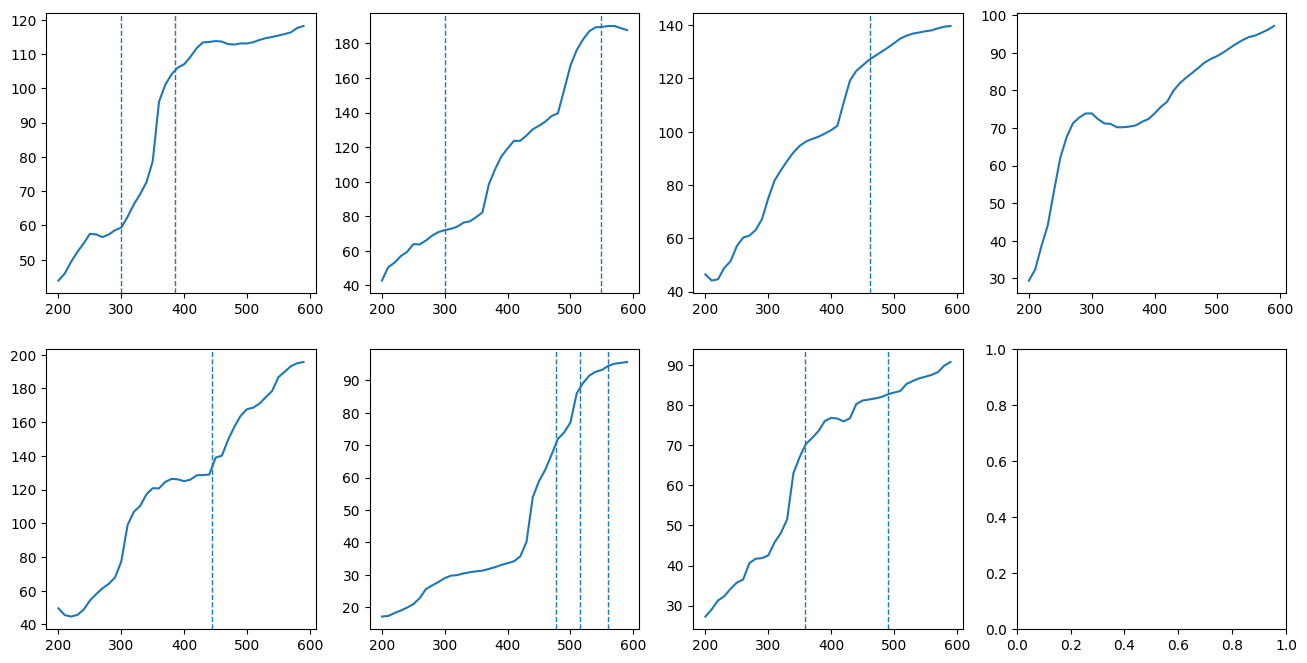

In [12]:
snaps_arange = np.arange(200, 600, 10)
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax[0][0].plot(snaps_arange, m12b_host_mass, lw=1.5)
ax[0][1].plot(snaps_arange, m12c_host_mass, lw=1.5)
ax[0][2].plot(snaps_arange, m12f_host_mass, lw=1.5)
ax[0][3].plot(snaps_arange, m12i_host_mass, lw=1.5)
ax[1][0].plot(snaps_arange, m12m_host_mass, lw=1.5)
ax[1][1].plot(snaps_arange, m12r_host_mass, lw=1.5)
ax[1][2].plot(snaps_arange, m12w_host_mass, lw=1.5)

ax[0][0].axvline(300, lw=1, ls='--', c='C0')
ax[0][0].axvline(385, lw=1, ls='--', c='C0')

ax[0][1].axvline(300, lw=1, ls='--', c='C0')
ax[0][1].axvline(549, lw=1, ls='--', c='C0')

ax[0][2].axvline(462, lw=1, ls='--', c='C0')

#ax[0][3].axvline(549, lw=1, ls='--', c='C0')

ax[1][0].axvline(444, lw=1, ls='--', c='C0')

ax[1][1].axvline(477, lw=1, ls='--', c='C0')
ax[1][1].axvline(515, lw=1, ls='--', c='C0')
ax[1][1].axvline(560, lw=1, ls='--', c='C0')

ax[1][2].axvline(358, lw=1, ls='--', c='C0')
ax[1][2].axvline(490, lw=1, ls='--', c='C0')

plt.show()


In [76]:
#mass.bound! 

In [18]:
m12wm/1E10

7.533088768

In [137]:
m12b_msat = np.max(m12b_sat['mass'])
m12c_msat = np.max(m12c_sat['mass'])
m12f_msat = np.max(m12f_sat_1['mass'][:220])
m12i_msat = np.max(m12i_sat['mass'][:80])
m12m_msat = np.max(m12m_sat['mass'][:200])
m12r_msat1 = np.max(m12r_sat1['mass'])
m12r_msat2 = np.max(m12r_sat2['mass'])
m12r_msat3 = np.max(m12r_sat2['mass'])

m12w_msat1 = np.max(m12w_sat1['mass'][:70])
m12w_msat2 = np.max(m12w_sat2['mass'])
m12w_msat3 = np.max(m12w_sat3['mass'])


print(m12b_msat/1e10, m12c_msat/1e10, m12f_msat/1e10, m12i_msat/1e10, m12m_msat/1e10)
print(m12r_msat1/1e10, m12r_msat2/1e10, m12r_msat3/1e10)
print(m12w_msat1/1e10, m12w_msat2/1e10, m12w_msat3/1e10)

21.3490024448 16.6581190656 15.6609691648 2.8816238592 3.4283476992
23.5205885952 13.6636760064 13.6636760064
8.8252940288 4.8752939008 90.8882345984


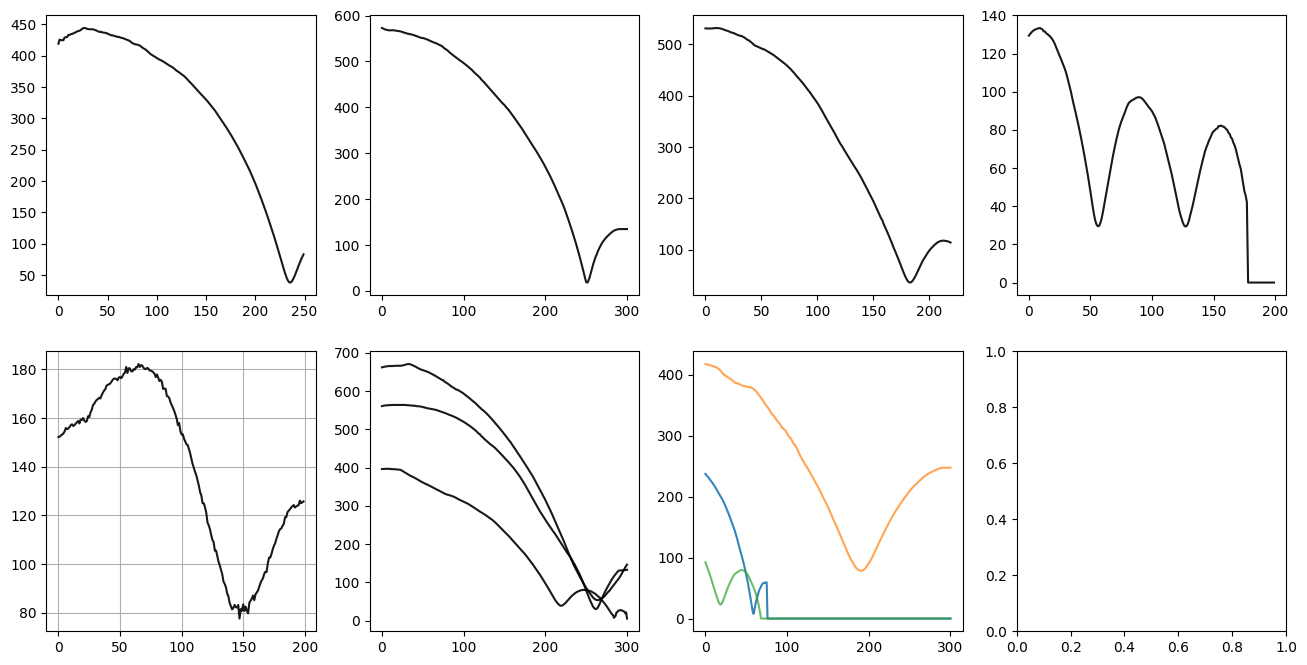

In [136]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8))

ax[0][0].plot(norm(m12b_sat['pos'], axis=1)[:250], c='k', lw=1.5, alpha=0.9) 


ax[0][1].plot(norm(m12c_sat['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 
ax[0][2].plot(norm(m12f_sat_1['pos'], axis=1)[:220], c='k', lw=1.5, alpha=0.9) 

ax[0][3].plot(norm(m12i_sat['pos'], axis=1)[:200], c='k', lw=1.5, alpha=0.9) 
ax[1][0].plot(norm(m12m_sat['pos'], axis=1)[:200], c='k', lw=1.5, alpha=0.9) 
ax[1][1].plot(norm(m12r_sat1['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 
ax[1][1].plot(norm(m12r_sat2['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 
ax[1][1].plot(norm(m12r_sat3['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 

ax[1][2].plot(norm(m12w_sat1['pos'], axis=1)[:], c='C0', lw=1.5, alpha=0.9) 
ax[1][2].plot(norm(m12w_sat2['pos'], axis=1)[:], c='C1', lw=1.5, alpha=0.7) 
ax[1][2].plot(norm(m12w_sat3['pos'], axis=1)[:], c='C2', lw=1.5, alpha=0.7) 

ax[1][0].grid()
plt.show()
#plt.savefig('hey.png')



In [94]:
#m12f_sat_1['pos']

In [237]:
m12f_sat1, m12f_msat1, m12fs1_treeid = get_halo_satellite('m12f', -3, ninit=150)
m12f_sat2, m12f_msat2, m12fs2_treeid = get_halo_satellite('m12f', -4, ninit=200)
m12f_sat3, m12f_msat3, m12fs3_treeid = get_halo_satellite('m12f', -6, ninit=200)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/snapshot_times.txt

  using snapshot index = 150, redshift = 2.355

* read 47578 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/halo_150.hdf5

# in halo_analysis.halo_io.Particle():
* read 47578 halos, 207 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/star_150.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/snapshot_times.txt

* read 28366111 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12f_res7100/snapshot_times.txt

  using snapshot index = 200, redshift = 1.647

* read 71092 halos 

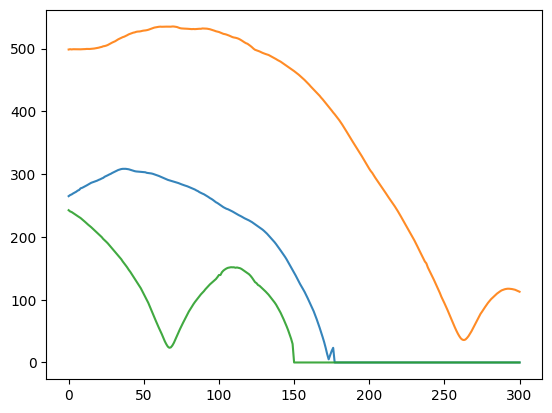

In [239]:
plt.plot(norm(m12f_sat1['pos'], axis=1), c='C0', lw=1.5, alpha=0.9) 
plt.plot(norm(m12f_sat2['pos'], axis=1), c='C1', lw=1.5, alpha=0.9) 
plt.plot(norm(m12f_sat3['pos'], axis=1), c='C2', lw=1.5, alpha=0.9) 

plt.show()

In [211]:
## Get pericenter and apocenter distances: 



In [189]:
print(m12b_msat/1e10, m12c_msat/1e10, m12f_msat/1e10, m12i_msat/1e10, m12m_msat/1e10)
print(m12r_msat1/1e10, m12r_msat2/1e10, m12r_msat3/1e10)
print(m12w_msat1/1e10, m12w_msat2/1e10, m12w_msat3/1e10)

21.3490024448 16.6581190656 15.6609691648 2.8816238592 3.4283476992
23.5205885952 13.6636760064 13.6636760064
5.8520588288 3.625293824 4.085000192


In [33]:
m12b = 21
m12c = 16
m12f = 15
m12i = 2.9
m12m = 3.42
m12r1 = 23
m12r2 = 13
m12r3 = 13
m12w1 = 9
m12w2 = 4 # 0.8 ?




m12b_host_infall_mass  
m12c_host_infall_mass 
m12f_host_infall_mass 
m12i_host_infall_mass 
m12m_host_infall_mass 
m12r_host_infall_mass1 
m12r_host_infall_mass2
m12r_host_infall_mass3
m12w_host_infall_mass1
m12w_host_infall_mass2

80.2911748096

In [34]:
m12bL = 43940.08689919018
m12cL = 19147.021170139116
m12fL = 49408.491760372715 
m12rL = 26120.13206852209
m12wL = 4035.540975517406

In [35]:
m12b_host_infall_mass

82.605408256

In [38]:
rperi_m12 = np.array([rperi_m12b, rperi_m12c, rperi_m12f, rperi_m12r2, rperi_m12w2])
e_m12 = np.array([e_m12b, e_m12c, e_m12f, e_m12r2, e_m12w2])

In [223]:
lmc3_orbit = np.loadtxt('../../../gadget_runs/orbits/LMC3_100Mb0_orbit.txt')
lmc4_orbit = np.loadtxt('../../../gadget_runs/orbits/LMC4_100Mb0_2_orbit.txt')
lmc5_orbit = np.loadtxt('../../../gadget_runs/orbits/LMC5_100Mb0_orbit.txt')
lmc6_orbit = np.loadtxt('../../../gadget_runs/orbits/LMC6_100Mb0_orbit.txt')

In [233]:
def lmc_orbit(orbit):
    xlmc = orbit[:,6]-orbit[:,0]
    ylmc = orbit[:,7]-orbit[:,1]
    zlmc = orbit[:,8]-orbit[:,2]
    
    vxlmc = orbit[:,9]-orbit[:,3]
    vylmc = orbit[:,10]-orbit[:,4]
    vzlmc = orbit[:,11]-orbit[:,5]
    
    #L = np.cross(np.array([xlmc, ylmc, zlmc]), np.array([vxlmc, vylmc, vzlmc]), axis=0)
    #print(np.array([xlmc, ylmc, zlmc]), np.array([vxlmc, vylmc, vzlmc]))
    return [xlmc, ylmc, zlmc], norm([xlmc, ylmc, zlmc], axis=0)
        

In [239]:
xyz, rlmc3 = lmc_orbit(lmc3_orbit)
xyz, rlmc4 = lmc_orbit(lmc4_orbit)
xyz, rlmc5 = lmc_orbit(lmc5_orbit)
xyz, rlmc6 = lmc_orbit(lmc6_orbit)

In [240]:
rperi_lmc3 = np.min(rlmc3)
rperi_lmc4 = np.min(rlmc4)
rperi_lmc5 = np.min(rlmc5)
rperi_lmc6 = np.min(rlmc6)

In [242]:
print(rperi_lmc3, rperi_lmc4, rperi_lmc5, rperi_lmc6)

42.8398465246102 42.736377917126234 44.3313022980394 42.60247644363717


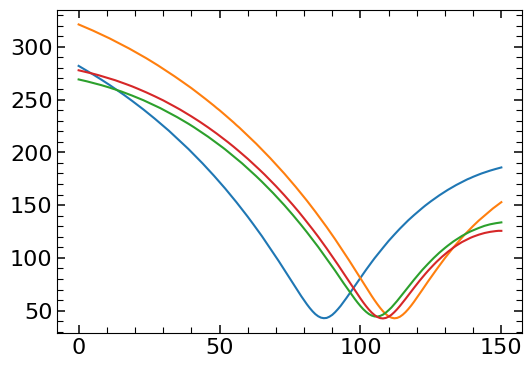

In [241]:
plt.plot(rlmc3)
plt.plot(rlmc4)
plt.plot(rlmc5)
plt.plot(rlmc6)

plt.show()

In [244]:
get_eccentricities(rlmc3)

(0.7361460663091283, 42.8398465246102)

In [246]:
e_lmc3 = (450 - rperi_lmc3 )/  (450 + rperi_lmc3)
e_lmc4 = (400 - rperi_lmc4 )/  (400 + rperi_lmc4)
e_lmc5 = (300 - rperi_lmc5 )/  (300 + rperi_lmc5)
e_lmc6 = (290 - rperi_lmc6 )/  (290 + rperi_lmc6)

In [247]:
print(e_lmc3, e_lmc4, e_lmc5, e_lmc6)

0.8261510434811363 0.8069443576415316 0.7425078579718087 0.7438234561620495


In [224]:
lmc3L = lmc_L(lmc3_orbit)
lmc4L = lmc_L(lmc4_orbit)
lmc5L = lmc_L(lmc5_orbit)
lmc6L = lmc_L(lmc6_orbit)

NameError: name 'lmc_L' is not defined

In [42]:
print(lmc3L, lmc4L, lmc5L, lmc6L)
print(lmc3L*0.8, lmc4L*1, lmc5L*1.8, lmc6L*2.5)


17555.937732721985 18092.794345467835 19443.66185049828 19999.071684712686
14044.750186177589 18092.794345467835 34998.5913308969 49997.67921178172


In [43]:
Ltotal = np.array([m12bL, m12cL, m12fL, m12rL, m12wL, lmc3L*0.8, lmc4L, lmc5L*1.8, lmc6L*2.5])

In [44]:
m12r/m12r_host_infall_mass

NameError: name 'm12r' is not defined

In [51]:
#colors = plt.cm.inferno(np.linspace(0,1,20))
#cm = plt.cm.ScalarMappable(cmap=plt.cm.inferno, norm=plt.Normalize(vmin=m12b_t[300], vmax=m12b_t[450]))


In [53]:
print(rperi_m12b, e_m12b, m12b/m12b_host_infall_mass)

37.89808749975561 0.8427869293893682 0.2542206429743621


In [ ]:
all_peris = np.array([rperi_m12b, rperi_m12c, rperi_m12f, rperi_m12r1, rperi_m12r2,rperi_m12r3,
                     rperi_m12w1, rperi_m12w2])

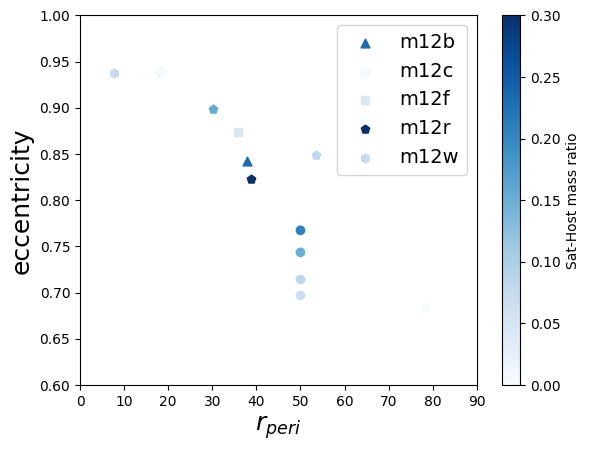

In [52]:
# Color bar should be Mass ratios 
cm = plt.cm.get_cmap('Blues')
#xy = np.linspace(0.1, 0.3, 100)
minv = 0.0
maxv = 0.3

plt.scatter(rperi_m12b, e_m12b, label='m12b',
            c=m12b/m12b_host_infall_mass, marker='^', s=40, cmap=cm, vmin=minv, vmax=maxv)
plt.scatter(rperi_m12c, e_m12c, label='m12c', 
            c=m12c/m12c_host_infall_mass, marker='D', s=40,  cmap=cm, vmin=minv, vmax=maxv)
plt.scatter(rperi_m12f, e_m12f, label='m12f', 
            c=m12f/m12f_host_infall_mass, marker='s', s=40, cmap=cm, vmin=minv, vmax=maxv)

plt.scatter(rperi_m12r1, e_m12r1, label='m12r', c=m12r1/m12r_host_infall_mass1, 
            marker='p', s=40, cmap=cm, vmin=0.1, vmax=0.3)

plt.scatter(rperi_m12r2, e_m12r2, c=m12r2/m12r_host_infall_mass2, 
            marker='p', s=40, cmap=cm, vmin=0.1, vmax=0.3)


plt.scatter(rperi_m12r3, e_m12r3, c=m12r3/m12r_host_infall_mass3, 
            marker='p', s=40, cmap=cm, vmin=0.1, vmax=0.3)



plt.scatter(rperi_m12w1, e_m12w1, label='m12w', c=m12w1/m12w_host_infall_mass1,
            marker='h', s=40, cmap=cm, vmin=0.1, vmax=0.3)

plt.scatter(rperi_m12w2, e_m12w2, c=m12w2/m12w_host_infall_mass2,
            marker='h', s=40, cmap=cm, vmin=0.1, vmax=0.3)

#plt.scatter(rperi_m12, e_m12, c='k', s=180, marker='*')
#sc = plt.scatter(rperi_m12, e_m12, c=z[:5], s=150, marker='*')



#plt.scatter(np.arra(LMC_peris[0], e_lmc[0], c='k', label='LMC models')
#plt.scatter(LMC_peris[1], e_lmc[1], c='k')
#plt.scatter(LMC_peris[2], e_lmc[2], c='k')
sc = plt.scatter(LMC_peris, e_lmc, c=[0.8/12, 1/12, 1.8/12, 2.5/12], cmap=cm, vmin=0, vmax=0.3)

cbar = plt.colorbar(sc)
cbar.set_label('Sat-Host mass ratio')
plt.xlim(0, 90)
plt.ylim(0.6, 1)

plt.legend(fontsize=14)
plt.xlabel(r'$r_{peri}$', fontsize=18)
plt.ylabel('eccentricity', fontsize=18)
plt.show()
#plt.savefig('fire_e_rperi.pdf', bbox_inches='tight')

- L vs rperi color mass ratios 
- L as a function of time scaling by enclosed mass of satellite
- Sinusoidal in poles  Lhost = -Lsat at peri show if this reproduce the OP computed in DM particles